# Analysis of variation of local networks

# Load the experiment 5 database

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df_exp9 = pd.read_csv('../9_networks_all/outputs/exp9_aleatory_linear_circle_3_9_10/data.csv')
df_exp9.head()
print('Database Loaded')

Database Loaded


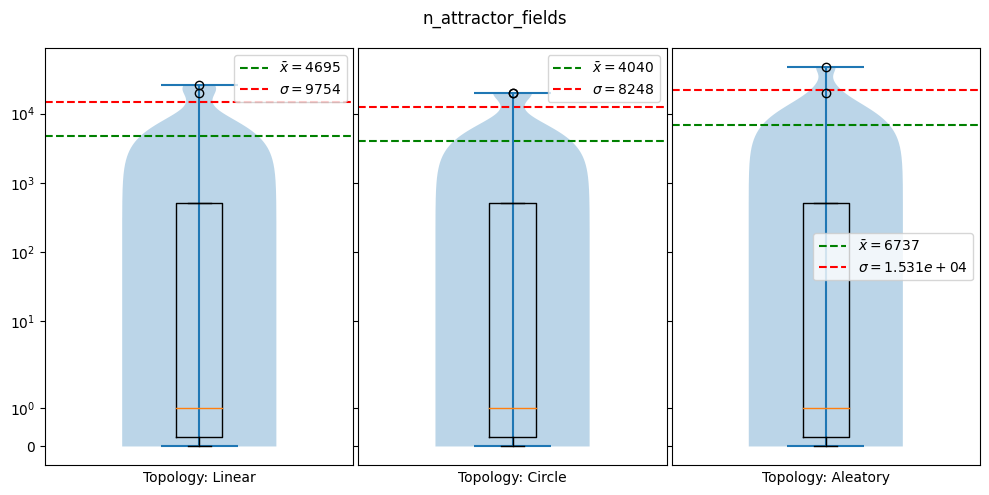

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_exp9

# Filter the data for specific topologies and local networks
l_topologies = df_exp9['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle", 2: "Aleatory"}

# Filtrar los datos para n_local_networks igual a 9
df_filtered = df_exp9[df_exp9['n_local_networks'] == 9]

# Agrupar por topología
grouped = df_filtered.groupby('v_topology')

# Crear subplots
fig, axs = plt.subplots(1, len(l_topologies), sharey=True, figsize=(10, 5))

# Si solo hay un subplot, hacer que axs sea una lista para iterar de forma uniforme
if len(l_topologies) == 1:
    axs = [axs]

# Iterar a través de las topologías y crear los gráficos
for ax, i_topology in zip(axs, l_topologies):
    group = grouped.get_group(i_topology)
    data = group['n_attractor_fields']

    # Calcular la media y la desviación estándar
    mean = data.mean()
    std_max = data.std()

    # Trazar líneas de media y desviación estándar
    ax.axhline(y=mean, xmin=0.0, xmax=1.0, color='g', ls='--',
               label=fr'$\bar{{x}}={mean:.4g}$')
    ax.axhline(y=mean + std_max, xmin=0.0, xmax=1.0, color='r', ls='--',
               label=fr'$\sigma={std_max:.4g}$')

    # Crear gráfico de violín
    ax.violinplot(data)
    ax.boxplot(data)

    # Configurar etiquetas y límites
    ax.legend()
    ax.set_yscale('symlog')
    ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
    ax.set_xticks([])
    ax.set_xlim((0.5, 1.5))

# Establecer el título general de la figura y el layout
fig.suptitle('n_attractor_fields')
fig.tight_layout(w_pad=0)

# Mostrar el gráfico
plt.show()
